In [1]:
import sys
#sys.path.append("/home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/lartpc_mlreco3d")   # locally
#sys.path.append("/home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/pi0_reco")          # locally
sys.path.append("/u/nu/rberner/pi0_reconstruction/lartpc_mlreco3d")                            # SLAC
sys.path.append("/u/nu/rberner/pi0_reconstruction/pi0_reco")                                   # SLAC

import yaml
# Configuration for the data loader
#io_cfg =  """
#iotool:
#  batch_size: 1 
#  #minibatch_size: 5 
#  shuffle: False
#  num_workers: 4
#  collate_fn: CollateSparse
#  #sampler:
#  #  name: RandomSequenceSampler 
#  #  batch_size: 32
#  dataset:
#    name: LArCVDataset 
#    data_keys:
#    #- /gpfs/slac/staas/fs1/g/neutrino/kvtsang/pdune/mpv/val/*.root
#    #- /gpfs/slac/staas/fs1/g/neutrino/kvtsang/data/2019-09-27/*.root
#    #- /gpfs/slac/staas/fs1/g/neutrino/kvtsang/data/2019-09-27/larcv_mc_00002.root
#    #- /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/data/larcv_michel_pi0_v04.root
#    - /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/data/larcv_mc_00002.root
#    limit_num_files: 5
#    schema:
#      input_data: 
#        - parse_sparse3d_scn
#        - sparse3d_reco
#        - sparse3d_reco_inv_chi2
#        - sparse3d_reco_hit_charge0
#        - sparse3d_reco_hit_charge1
#        - sparse3d_reco_hit_charge2
#        - sparse3d_reco_hit_rms0
#        - sparse3d_reco_hit_rms1
#        - sparse3d_reco_hit_rms2
#        - sparse3d_reco_hit_time0
#        - sparse3d_reco_hit_time1
#        - sparse3d_reco_hit_time2                                                                        
#        - sparse3d_reco_occupancy
#      energy:
#        - parse_sparse3d_scn
#        - sparse3d_mcst
#      charge:
#        - parse_sparse3d_scn
#        - sparse3d_reco
#      segment_label_true:
#        - parse_sparse3d_scn
#        - sparse3d_fivetypes_true
#      segment_label_reco:
#        - parse_sparse3d_scn
#        - sparse3d_fivetypes_reco
#      particles:
#        - parse_particle_asis
#        - particle_mcst
#        - cluster3d_mcst
#      particles_label:
#        - parse_particle_points
#        - sparse3d_reco                                                                                  
#        - particle_mcst
#      group_label_true:
#        - parse_cluster3d_clean
#        - cluster3d_mcst
#        - sparse3d_mcst
#      group_label_reco:
#        - parse_cluster3d
#        - cluster3d_mcst_reco
#        - sparse3d_mcst
#      dbscan_label_true:
#        - parse_dbscan
#        - sparse3d_fivetypes_true
#      dbscan_label_reco:
#        - parse_dbscan
#        - sparse3d_fivetypes_reco
#"""

#io_cfg = """
#iotool:
#  batch_size: 1
#  shuffle: False
#  num_workers: 1
#  collate_fn: CollateSparse
#  dataset:
#    name: LArCVDataset
#    data_keys:
#     #- /gpfs/slac/staas/fs1/g/neutrino/kterao/data/mpvmpr_2020_01_v04/train.root
#     #- /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/data/train.root       # locally
#     - /u/nu/rberner/pi0_reconstruction/data/train.root                                # SLAC
#    limit_num_files: 25
#    schema:
#      input_data:
#        - parse_sparse3d_scn
#        - sparse3d_pcluster
#      segment_label:
#        - parse_sparse3d_scn
#        - sparse3d_pcluster_semantics
#      cluster_label:
#        - parse_cluster3d_full
#        - cluster3d_pcluster
#        - particle_corrected
#      particles:
#        - parse_particle_asis
#        - particle_corrected
#        - cluster3d_pcluster
#      ppn_label:
#        - parse_particle_points
#        - sparse3d_pcluster
#        - particle_corrected
#"""

io_cfg = """
iotool:
  batch_size: 1
  shuffle: False
  num_workers: 1
  collate_fn: CollateSparse
  #sampler:
  #  name: RandomSequenceSampler
  dataset:
    name: LArCVDataset
    data_keys:
     #- /gpfs/slac/staas/fs1/g/neutrino/kterao/data/mpvmpr_2020_01_v04/train.root
     #- /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/data/train.root       # locally
     - /u/nu/rberner/pi0_reconstruction/data/train.root                                # SLAC
    limit_num_files: 1
    schema:
      input_data:
        - parse_sparse3d_scn
        - sparse3d_pcluster
      segment_label:
        - parse_sparse3d_scn
        - sparse3d_pcluster_semantics
      semantics:
        - parse_sparse3d_scn
        - sparse3d_pcluster_semantics
      dbscan_label:
        - parse_cluster3d_clean_full
        - cluster3d_pcluster
        - particle_corrected
        - sparse3d_pcluster_semantics
      particles_label:
        - parse_particle_points
        - sparse3d_pcluster
        - particle_corrected
      cluster_label:
        - parse_cluster3d_full
        - cluster3d_pcluster
        - particle_corrected
      particles:
        - parse_particle_asis
        - particle_corrected
        - cluster3d_pcluster
      ppn_label:
        - parse_particle_points
        - sparse3d_pcluster
        - particle_corrected
"""

In [2]:
# Configuration of the reconstruction chain
#chain_cfg = '''
#name: pi0_chain_test
#net_cfg: /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/config_files/uresnet_ppn.cfg
#input:            energy     # charge
#segment:          uresnet    # mask, uresnet
#response:         average    # constant, average(, full, enet)
#response_cst:     0.0082     # energy response constant (0.0082 for mask, 0.0052 for uresnet)
#response_average: 0.877      # energy response average (1.3693 for mask, 0.877 for uresnet)
#shower_start:     truth      # truth, ppn
#shower_dir:       truth      # truth, pca, cent
#shower_energy:    truth      # truth, group, cone, gnn
#shower_match:     truth      # truth, proximity
#refit_dir:        true       # true, false
#refit_cone:       true       # true, false
#'''
chain_cfg = '''
name: pi0_chain_fiducialized
#net_cfg: /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/config_files/uresnet_ppn.cfg    # locally
#net_cfg: /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/config_files/train_cluster_chain_gnn_dbscan.cfg
#net_cfg: /u/nu/rberner/pi0_reconstruction/config_files/uresnet_ppn_gpu0.cfg                        # SLAC
net_cfg: /u/nu/rberner/pi0_reconstruction/config_files/fullChain_gnn_dbscan_gpu1.cfg               # SLAC
segment:               uresnet # label, uresnet
deghost:                      # label, uresnet
charge2energy:                # null, constant, average(, full, enet)
charge2energy_cst:     0.0082 # energy response constant (0.0082 for mask, 0.0052 for uresnet)
charge2energy_average: 0.877  # energy response average (1.3693 for mask, 0.877 for uresnet)
shower_start:          ppn    # label, ppn
shower_fragment:       dbscan # label, dbscan
shower_direction:      pca    # label, pca, cent
shower_cluster:        cone   # label, cone
shower_cluster_params:
  IP: 40
  Distance: 300
shower_energy:         pixel_sum  # label, pixel_sum
shower_match:          proximity  # label, proximity
refit_dir:             true   # true, false
refit_cone:            true   # true, false
fiducialize:           14      # Number of pixels to be removed from edge of LAr volume (pixel pitch: 3mm)
'''
chain_cfg = yaml.load(chain_cfg,Loader=yaml.Loader)

In [3]:
from IPython.display import HTML, display

# Decorative progress bar
def progress(count, total, unit, message=''):
    return HTML("""
        <progress 
            value='{count}'
            max='{total}',
            style='width: 30%'
        >
            {count}
        </progress> {count}/{total} {unit} ({frac}%) ... {message}
    """.format(count=count, total=total, unit=unit, frac=int(float(count)/float(total)*100.),message=message))

In [4]:
# Initialize the chain
from pi0.chain import Pi0Chain
chain = Pi0Chain(io_cfg, chain_cfg)
from larcv import larcv
import numpy as np
from numpy import linalg

# Create CSV file for all true pi0s in the event
from mlreco.utils import CSVData
log_path_true_pi0 = 'true_pi0s.csv'
log_true_pi0 = CSVData(log_path_true_pi0)

# Create CSV file for all reconstructed showers in the event
from mlreco.utils import CSVData
log_path_reco_gamma = 'reco_gammas.csv'
log_reco_gamma = CSVData(log_path_reco_gamma)

# Loop over the full dataset
masses    = []
i_draw    = 0
n_draw    = 0
data_size = 1000 #len(chain.hs.data_io)
out       = display(progress(0,data_size,'images'),display_id=True)

for event in range(data_size):

    #print(' ======================================================================== ')
    #print(' event: ', event)
    
    #chain.run_loop()

    # pass if RuntimeError (likely, it is in fragment_merger.py: trace_tree function)
    try:
        chain.run_loop()
    except RuntimeError:
        print('RuntimeError')
        continue
    except ValueError:
        print('ValueError')
        continue
    except IndexError:
        print('IndexError')
        continue

    #print(' index: ', chain.event['index'])
    #print(' index: ', chain.event['index'][0])
    

    # Draw the last event if requested
    # Note: matches: if there are two reconstructed showers pointing to the same point AND this point close to a track
    #if 'matches' in chain.output and len(chain.output['matches']) and i_draw < n_draw:
    #    chain.draw()
    #    i_draw += 1

    #draw_events = [66]
    #if chain.event['index'][0] in draw_events:
    #    chain.draw()

    #chain.draw()

    out.update(progress(event,data_size,'images'))

out.update(progress(data_size,data_size,'images'))

# Simplest way to run the full chain
#chain = Pi0Chain(io_cfg, chain_cfg)
#chain.run()

# Rename .csv file with masses in order to keep track of parameters
#name_old = chain_cfg['name']+'_log.csv'
#name_new = chain_cfg['name']+'_' + str(chain_cfg['fiducialize']) + 'px_' + str(data_size) + 'ev_log.csv'

#! mv $name_old $name_new

Welcome to JupyROOT 6.16/00
Initialized Pi0 mass chain, log path: masses_fiducialized_14px.csv

Config processed at: Linux nu-gpu01.slac.stanford.edu 3.10.0-1062.18.1.el7.x86_64 #1 SMP Tue Mar 17 23:49:17 UTC 2020 x86_64 x86_64 x86_64 GNU/Linux

$CUDA_VISIBLE_DEVICES="1"

{   'iotool': {   'batch_size': 1,
                  'collate_fn': 'CollateSparse',
                  'dataset': {   'data_keys': [   '/u/nu/rberner/pi0_reconstruction/data/train.root'],
                                 'limit_num_files': 1,
                                 'name': 'LArCVDataset',
                                 'schema': {   'cluster_label': [   'parse_cluster3d_full',
                                                                    'cluster3d_pcluster',
                                                                    'particle_corrected'],
                                               'dbscan_label': [   'parse_cluster3d_clean_full',
                                                          

ValueError
ValueError
IndexError
IndexError
IndexError
IndexError
ValueError
IndexError
IndexError
IndexError
IndexError
ValueError
ValueError
ValueError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
ValueError
ValueError
IndexError
IndexError
ValueError
ValueError
IndexError
IndexError
IndexError
ValueError
IndexError
ValueError
IndexError
IndexError
ValueError
ValueError
ValueError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
ValueError
IndexError
ValueError
IndexError
IndexError
IndexError
ValueError
ValueError
ValueError
IndexError
ValueError
IndexError
IndexError
IndexError
ValueError
ValueError
ValueError
ValueError
IndexError
IndexError
ValueError
IndexError
IndexError
IndexError
ValueError
IndexError
ValueError
ValueError
ValueError
IndexError
ValueError
IndexError
IndexError
IndexError


/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))


IndexError
IndexError
IndexError
IndexError
IndexError


/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))


IndexError
ValueError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
IndexError
ValueError
ValueError
ValueError
IndexError
ValueError
IndexError
ValueError
IndexError
IndexError
IndexError
ValueError
IndexError
IndexError
IndexError
ValueError
IndexError
IndexError
ValueError


<Figure size 1080x720 with 0 Axes>

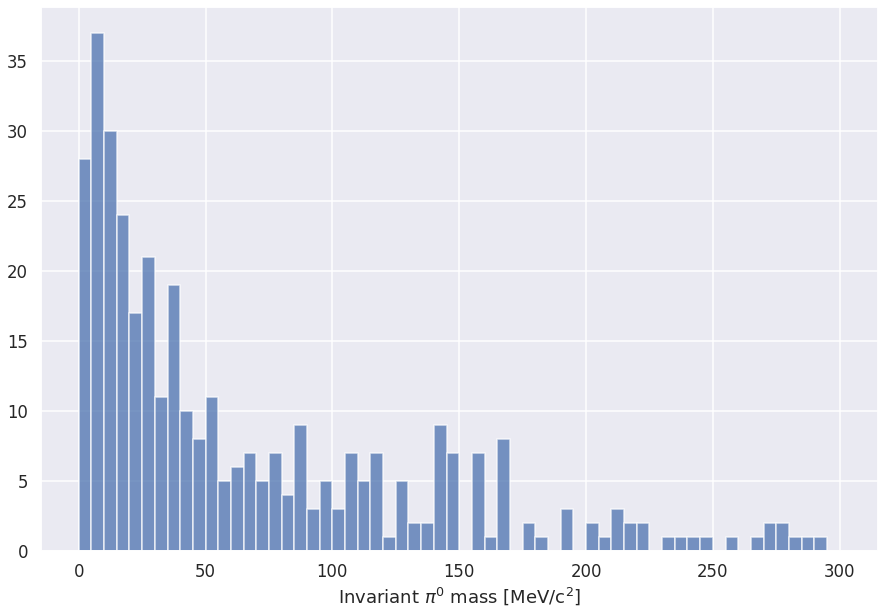

In [5]:
import numpy as np
import pandas as pd
import seaborn
from matplotlib import pyplot as plt

seaborn.set(rc={'figure.figsize':(15, 10),})
seaborn.set_context('talk') # or paper

def gaus(x, a, mu, sigma):
    return  a*np.exp(-(x-mu)**2/2./sigma**2)/np.sqrt(2./np.pi)/sigma

def fit_func(bins, n, func):
    from scipy.optimize import curve_fit
    center = (bins[:-1] + bins[1:]) / 2
    popt, pcov = curve_fit(func, center, n, p0=(100, 100, 10))
    print(" Fitted parameters: \n a [-]: \t ", popt[0],
          " \n \u03BC [MeV/c2]: \t ", popt[1],
          " \n \u03C3 [MeV/c2]: \t ", popt[2])

    x = np.arange(0, 300, 1)
    y = func(x, popt[0], popt[1], popt[2])
    plt.plot(x, y, label='Fit: mass=%5.3f, width=%5.3f' % (popt[1], popt[2]))
    plt.legend()

# Load the output file, draw mass peak
#df = pd.read_csv(chain_cfg['name']+'_' + str(chain_cfg['fiducialize']) + 'px_' + str(data_size) + 'ev_log.csv')
df = pd.read_csv('masses_fiducialized_' + str(chain_cfg['fiducialize']) + 'px.csv')
plt.figure()
fig, ax = plt.subplots()
n, bins, patches = ax.hist(df.pion_mass, bins=60, range=[0,300], alpha=0.75)
ax.set_xlabel('Invariant $\pi^0$ mass [MeV/c$^2$]')

# Fit the peak with a Gaussian
#fit_func(bins, n, gaus)
#fig_name = '06_fiducialized_' + str(chain_cfg['fiducialize']) + 'px_' + str(data_size) + 'ev.png'
fig_name = 'masses_fiducialized_' + str(chain_cfg['fiducialize']) + 'px.png'
plt.savefig(fig_name,dpi=400)
plt.show()

# Print pion mass dataframe
#print(df.to_string())

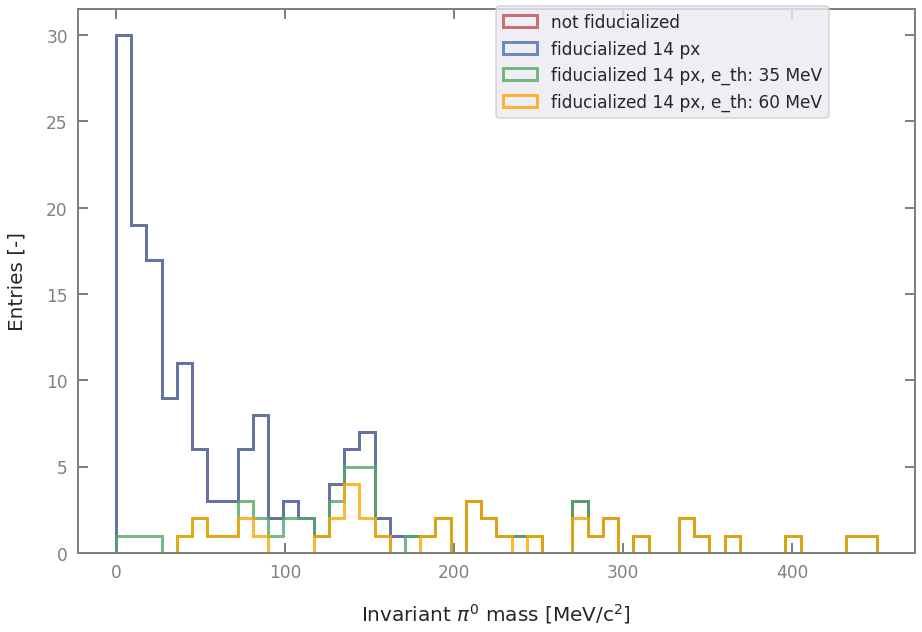

In [6]:
seaborn.set(rc={'figure.figsize':(15, 10),})
seaborn.set_context('talk') # or paper


# Define gauss function
def gaus(x, a, mu, sigma):
    return  a*np.exp(-(x-mu)**2/2./sigma**2)/np.sqrt(2./np.pi)/sigma


# Define fit function
def fit_func(bins, n, func):
    from scipy.optimize import curve_fit
    center = (bins[:-1] + bins[1:]) / 2
    popt, pcov = curve_fit(func, center, n, p0=(100, 100, 10))
    #print(" Fitted parameters: \n a [-]: \t ", popt[0],
    #      " \n \u03BC [MeV/c2]: \t ", popt[1],
    #      " \n \u03C3 [MeV/c2]: \t ", popt[2])
    print(" Fitted parameters: \n ",
          " \n a     [-]:      \t ", popt[0],
          " \n mu    [MeV/c2]: \t ", popt[1],
          " \n sigma [MeV/c2]: \t ", popt[2])

    #x = np.arange(0, 300, 1)
    #y = func(x, popt[0], popt[1], popt[2])
    #plt.plot(x, y, label='Fit: mass=%5.3f, width=%5.3f' % (popt[1], popt[2]))
    #plt.legend()

    return popt[0], popt[1], popt[2]


# Define histogram range and binning
x_min    = 0
x_max    = 450
n_bins_x = 50
x_bins = np.linspace(x_min,x_max,n_bins_x+1)


# Define parameters of the frame
fig = plt.figure() # plt.figure(figsize=(width,height))
#fig.patch.set_facecolor('white')
#fig.patch.set_alpha(0.0)
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('#ababab') # #ababab
ax.patch.set_alpha(0.0)
ax.spines['bottom'].set_color('0.5') #'black', ...
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_color('0.5')
ax.spines['top'].set_linewidth(2)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_color('0.5')
ax.spines['right'].set_linewidth(2)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('0.5')
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_visible(True)


# Ticks, grid and ticks labels
ax.tick_params(direction='in', length=10, width=2,                  # direction, length and width of the ticks (in, out, inout)
                colors='0.5',                                       # color of the ticks ('black', '0.5')
                bottom=True, top=True, right=True, left=True,       # whether to draw the respective ticks
                zorder = 10.,                                       # tick and label zorder
                pad = 10.,                                          # distance between ticks and tick labels
                labelsize = 17,                                     # size of the tick labels
                labelright=False, labeltop=False)                   # wether to draw the tick labels on axes
                #labelrotation=45.                                  # rotation of the labels
                #grid_color='black',                                # grid
                #grid_alpha=0.0,
                #grid_linewidth=1.0,
# colors='black','0.5'

# Define dataframes
df = pd.read_csv('if_n_TRUEpi0s_equals_n_MATCHEDpi0s.csv')

# Make filtered dataframes
df_unfiducialized = df
df_fiducialized = df[(df['matched_gamma_1_OOFV'] == 0) & (df['matched_gamma_2_OOFV'] == 0)]
df_fiducialized_plus_Eth35 = df_fiducialized[(df_fiducialized['matched_gamma_1_energy'] > 35) & (df_fiducialized['matched_gamma_2_energy'] > 35)]
df_fiducialized_plus_Eth60 = df_fiducialized[(df_fiducialized['matched_gamma_1_energy'] > 60) & (df_fiducialized['matched_gamma_2_energy'] > 60)]

# Plot dataframes
n_0, bins_0, patches_0 = plt.hist(df_unfiducialized.matched_pi0_mass, bins=n_bins_x, range=[x_min,x_max], histtype='step', color='r', linewidth=3, alpha=0.8)
n_1, bins_1, patches_1 = plt.hist(df_fiducialized.matched_pi0_mass, bins=n_bins_x, range=[x_min,x_max], histtype='step', color='b', linewidth=3, alpha=0.8)
n_2, bins_2, patches_2 = plt.hist(df_fiducialized_plus_Eth35.matched_pi0_mass, bins=n_bins_x, range=[x_min,x_max], histtype='step', color='g', linewidth=3, alpha=0.8)
n_3, bins_3, patches_3 = plt.hist(df_fiducialized_plus_Eth60.matched_pi0_mass, bins=n_bins_x, range=[x_min,x_max], histtype='step', color='orange', linewidth=3, alpha=0.8)

# Fit the peaks with Gaussians
# If you want to draw the fit function: uncomment lines in fit_func
#a_0, mu_0, sigma_0 = fit_func(bins_0, n_0, gaus)
#a_1, mu_1, sigma_1 = fit_func(bins_1, n_1, gaus)


# Legend
unfiducialized = 'not fiducialized'
fiducialized = 'fiducialized 14 px'
fiducialized_plus_Eth35 = 'fiducialized 14 px, e_th: 35 MeV'
fiducialized_plus_Eth60 = 'fiducialized 14 px, e_th: 60 MeV'
plt.legend([unfiducialized, fiducialized, fiducialized_plus_Eth35, fiducialized_plus_Eth60], loc=[0.5,0.8], prop={'size': 17}) # loc='upper right'


# Axis labels
plt.xlabel('Invariant $\pi^0$ mass [MeV/c$^2$]', fontsize=20, labelpad=20)
plt.ylabel('Entries [-]', fontsize=20, labelpad=20)


# Save figure
#fig_name = '0' + folder + '_pi0_mass_peak.png'
fig_name = 'if_n_TRUEpi0s_equals_n_MATCHEDpi0s.png'
plt.savefig(fig_name, dpi=400)
#plt.show()


6
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5]


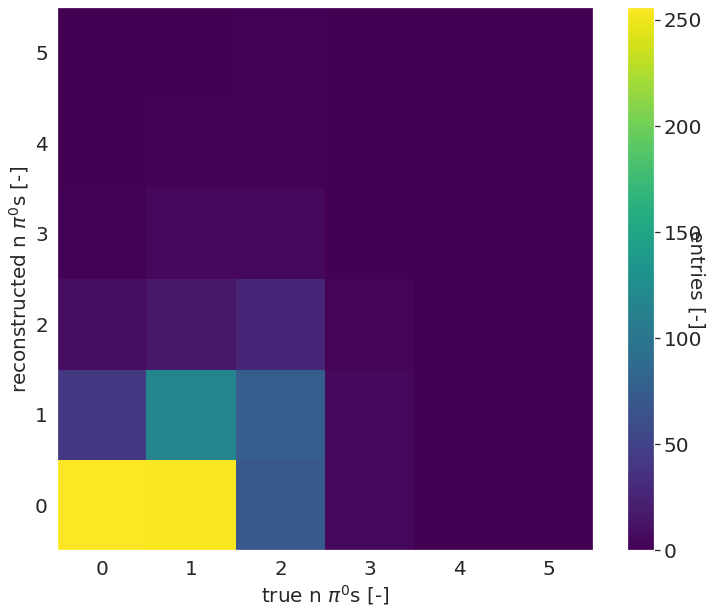

In [7]:
# Dataframe
data_file_name = 'n_pi0s_in_event.csv'
df = pd.read_csv(data_file_name)

# Size
seaborn.set(rc={'figure.figsize':(12,10),})

fig, ax = plt.subplots()

# Binning
#x_min  = -0.5
#x_max  = 12.5
#y_min  = -0.5
#y_max  = 12.5
#x_bins = np.arange(x_min,x_max+1,step=1.)
#y_bins = np.arange(y_min,y_max+1,step=1.)
x_min    = -0.5
x_max    = 5.5
y_min    = -0.5
y_max    = 5.5
n_bins_x = 6 #int(abs(x_max)-abs(x_min)+1)
n_bins_y = 6 #int(abs(y_max)-abs(y_min)+1)
x_bins = np.linspace(x_min,x_max,n_bins_x+1)
y_bins = np.linspace(y_min,y_max,n_bins_y+1)
print(n_bins_x)
print(x_bins)

#plt.hist2d(x,y,bins=[x_bins,y_bins])

# Data
plt.hist2d(df.true_n_pi0s, df.reco_n_pi0s, bins=[x_bins,y_bins], cmap=plt.cm.viridis)
# Color maps: viridis, plasma, magma, inferno

# Colorbar
#help(colorbar)
colorbar = plt.colorbar()
colorbar.set_label('entries [-]', rotation=270, fontsize=20)
colorbar.ax.tick_params(labelsize=20)
#v1 = np.linspace(z.min(), z.max(), 8, endpoint=True)
#plt.colorbar(ticks=v1)

# Axes
plt.xlabel('true n $\pi^0$s [-]', fontsize=20)
plt.ylabel('reconstructed n $\pi^0$s [-]', fontsize=20)
plt.tick_params(labelsize=20)

#ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
#ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))

plt.savefig("n_pi0s_in_event.png", bbox_inches='tight')
plt.show()
plt.close()

# Just some tests

In [8]:
# The config files contain, e.g., 'particles', 'cluster_label', etc.

# Get particle:
particle = chain.event['particles'][0][0]
#help(particle)

cluster = chain.event['cluster_label'][0]
#print("cluster: ", cluster)
# to see what the entries of this array are, look up the information from the .cfg:
      #cluster_label:
      #  - parse_cluster3d_full
      #  - cluster3d_pcluster
      #  - particle_corrected
# -> Need to have a look to 'parse_cluster3d_full, which lives in mlreco/iotools/parse_cluster3d_full'

In [9]:
chain.output.keys()

dict_keys(['forward', 'charge', 'segment', 'shower_mask', 'energy', 'showers', 'shower_fragments', 'leftover_energy', 'leftover_fragments', 'matches', 'vertices', 'OOFV', 'masses'])

In [10]:
chain.output['showers'][0]

In [11]:
shower = chain.output['showers'][0]
help(shower)

Help on Shower in module pi0.chain object:

class Shower(builtins.object)
 |  # Class that contains all the shower information
 |  
 |  Methods defined here:
 |  
 |  __init__(self, start=[], direction=[], voxels=[], energy=-1.0, pid=-1)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [12]:
particle = 0
help(chain.event['particles'][0][particle].first_step())

Help on Vertex in module larcv object:

class Vertex(ROOT.ObjectProxy)
 |  PyROOT object proxy (internal)
 |  
 |  Method resolution order:
 |      Vertex
 |      ROOT.ObjectProxy
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __assign__ = <ROOT.MethodProxy object>
 |  __cpp_eq__ = <ROOT.MethodProxy object>
 |  __cpp_ne__ = <ROOT.MethodProxy object>
 |  __eq__(...) from builtins.NoneType
 |      PyROOT custom instance method (internal)
 |  
 |  __init__ = <ROOT.MethodProxy object>
 |  __lt__ = <ROOT.MethodProxy object>
 |  __ne__(...) from builtins.NoneType
 |      PyROOT custom instance method (internal)
 |  
 |  __str__(...) from builtins.NoneType
 |      PyROOT custom instance method (internal)
 |  
 |  as_point = <ROOT.MethodProxy object>
 |  as_point2d = <ROOT.MethodProxy object>
 |  as_point3d = <ROOT.MethodProxy object>
 |  dump = <ROOT.MethodProxy object>
 |  reset = <ROOT.MethodProxy object>
 |  t = <ROOT.MethodProxy object>
 |  x = <ROOT.MethodProxy object>
 

In [13]:
! cat /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/config_files/uresnet_ppn.cfg

cat: /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/config_files/uresnet_ppn.cfg: No such file or directory


##### ! cat /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/pi0_reco/pi0/chain.py